In [33]:
import pandas as pd
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
df.drop(columns=['id','Unnamed: 32'],inplace=True,errors='ignore')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
y=df['diagnosis'].values.astype(int)
X=df.drop(columns=['diagnosis']).values.astype(float)
df.head()
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [53]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
import numpy as np

# 🔹 Preprocessing per metric
# ==============================================

# 1️⃣ Euclidean, Manhattan, Minkowski → Min–Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ Cosine → Row normalization (L2)
normalizer = Normalizer(norm='l2')
X_train_cos = normalizer.fit_transform(X_train)
X_test_cos = normalizer.transform(X_test)

# 3️⃣ Hamming → Binarize by median threshold
median_vals = np.median(X_train, axis=0)
X_train_ham = (X_train > median_vals)
X_test_ham = (X_test > median_vals)


🔍 Finding best k for each distance metric...

Distance Metric: EUCLIDEAN
  k= 3 -> Test Accuracy = 0.9561
  k= 4 -> Test Accuracy = 0.9474
  k= 9 -> Test Accuracy = 0.9649
  k=20 -> Test Accuracy = 0.9474
  k=47 -> Test Accuracy = 0.9561
✅ Best k for EUCLIDEAN: 9 (Accuracy = 0.9649)

Distance Metric: MANHATTAN
  k= 3 -> Test Accuracy = 0.9737
  k= 4 -> Test Accuracy = 0.9649
  k= 9 -> Test Accuracy = 0.9649
  k=20 -> Test Accuracy = 0.9474
  k=47 -> Test Accuracy = 0.9474
✅ Best k for MANHATTAN: 3 (Accuracy = 0.9737)

Distance Metric: MINKOWSKI
  k= 3 -> Test Accuracy = 0.9386
  k= 4 -> Test Accuracy = 0.9386
  k= 9 -> Test Accuracy = 0.9737
  k=20 -> Test Accuracy = 0.9474
  k=47 -> Test Accuracy = 0.9561
✅ Best k for MINKOWSKI: 9 (Accuracy = 0.9737)

Distance Metric: COSINE
  k= 3 -> Test Accuracy = 0.9035
  k= 4 -> Test Accuracy = 0.9211
  k= 9 -> Test Accuracy = 0.9035
  k=20 -> Test Accuracy = 0.8860
  k=47 -> Test Accuracy = 0.8772
✅ Best k for COSINE: 4 (Accuracy = 0.9211)

Dis

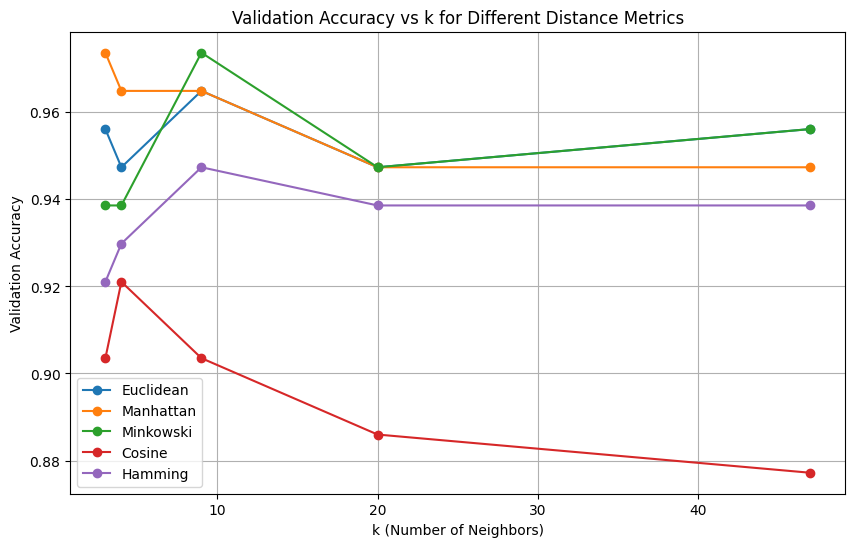


📊 Summary of Best k for Each Distance Metric:
--------------------------------------------------
Euclidean    | Best k =  9 | Accuracy = 0.9649
Manhattan    | Best k =  3 | Accuracy = 0.9737
Minkowski    | Best k =  9 | Accuracy = 0.9737
Cosine       | Best k =  4 | Accuracy = 0.9211
Hamming      | Best k =  9 | Accuracy = 0.9474


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# -------------------------
# Distance functions (pairwise)
# -------------------------
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p=3):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

def cosine_distance(x1, x2, eps=1e-10):
    dot = np.dot(x1, x2)
    n1 = np.linalg.norm(x1)
    n2 = np.linalg.norm(x2)
    if n1 < eps or n2 < eps:
        return 1.0
    return 1 - (dot / (n1 * n2))

def hamming_distance(x1, x2):
    # expects binary vectors (0/1)
    return np.mean(x1 != x2)

# -------------------------
# Simple KNN (your loop-based version)
# -------------------------
class KNNClassifier:
    def __init__(self, k=3, distance_metric='euclidean', p=3):
        self.k = k
        self.distance_metric = distance_metric
        self.p = p

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _compute_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return manhattan_distance(x1, x2)
        elif self.distance_metric == 'minkowski':
            return minkowski_distance(x1, x2, p=self.p)
        elif self.distance_metric == 'cosine':
            return cosine_distance(x1, x2)
        elif self.distance_metric == 'hamming':
            return hamming_distance(x1, x2)
        else:
            raise ValueError("Unknown distance metric")

    def _predict_single_point(self, test_point):
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = self._compute_distance(test_point, train_point)
            distances.append((dist, self.y_train[i]))

        # Sort by distance and get the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:self.k]

        # Extract the labels of the k nearest neighbors
        k_nearest_labels = [label for _, label in k_nearest_neighbors]

        # Perform majority voting
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common_label

    def predict(self, X_test):
        predictions = [self._predict_single_point(test_point) for test_point in X_test]
        return np.array(predictions)



# Map each metric to the corresponding train/val/test data
metric_to_data = {
    'euclidean': (X_train_scaled,  X_test_scaled),
    'manhattan': (X_train_scaled, X_test_scaled),
    'minkowski': (X_train_scaled,  X_test_scaled),
    'cosine':    (X_train_cos,   X_test_cos),
    'hamming':   (X_train_ham,    X_test_ham)
}

# -------------------------
# Grid search over k and metrics using validation set
# -------------------------
# Define all distance metrics you want to compare
distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine', 'hamming']

# Range of k values to test
#k_values = list(range(1, 50))  # k = 1 to 30
k_values = [3, 4, 9, 20, 47]

# Dictionary to store results
results = {}

print("\n🔍 Finding best k for each distance metric...\n")

# Loop through each metric
for metric in distance_metrics:
    Xtr, Xte = metric_to_data[metric]
    test_accuracies = []

    print(f"Distance Metric: {metric.upper()}")
    for k in k_values:
        clf = KNNClassifier(k=k, distance_metric=metric)
        clf.fit(Xtr, y_train)
        y_pred = clf.predict(Xte)
        acc = accuracy_score(y_test, y_pred)
        test_accuracies.append(acc)
        print(f"  k={k:2d} -> Test Accuracy = {acc:.4f}")

    # Save results for this metric
    results[metric] = test_accuracies

    # Find best k for this metric
    best_k_index = np.argmax(test_accuracies)
    best_k_value = k_values[best_k_index]
    best_acc = test_accuracies[best_k_index]
    print(f"✅ Best k for {metric.upper()}: {best_k_value} (Accuracy = {best_acc:.4f})\n")

# --------------------------------------------------------
# Plot all curves together for comparison
# --------------------------------------------------------
plt.figure(figsize=(10,6))

for metric, accuracies in results.items():
    plt.plot(k_values, accuracies, marker='o', label=f"{metric.capitalize()}")

plt.title("Validation Accuracy vs k for Different Distance Metrics")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------------------
# Display best k for each metric in a summary table
# --------------------------------------------------------
print("\n📊 Summary of Best k for Each Distance Metric:")
print("-" * 50)
for metric, accuracies in results.items():
    best_k = k_values[np.argmax(accuracies)]
    best_acc = np.max(accuracies)
    print(f"{metric.capitalize():<12} | Best k = {best_k:2d} | Accuracy = {best_acc:.4f}")



Confusion matrix (rows=true, cols=predicted):
 [[65  7]
 [ 0 42]]


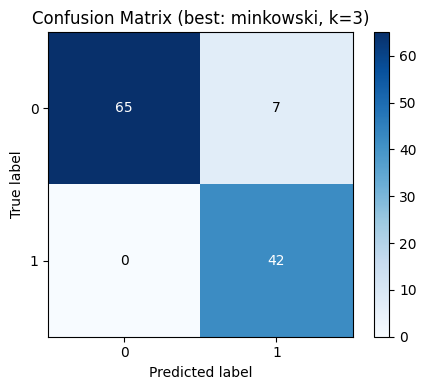


Classification report (from scratch):
  label  precision     recall   f1-score    support
---------------------------------------------------
      0     1.0000     0.9028     0.9489         72
      1     0.8571     1.0000     0.9231         42

micro avg     0.9386     0.9386     0.9386        114
macro avg     0.9286     0.9514     0.9360        114
weighted avg     0.9474     0.9386     0.9394        114


In [61]:
# -------------------------
# Confusion matrix & classification report (from scratch)
# -------------------------
import numpy as np
import matplotlib.pyplot as plt

def confusion_matrix_scratch(y_true, y_pred, labels=None):
    """
    Compute confusion matrix from scratch.
    labels: list/array of label values to order rows/cols (e.g. [0,1]).
    Returns cm as numpy array shape (n_labels, n_labels) where
    cm[i,j] = count of true label labels[i] predicted as labels[j]
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    labels = np.asarray(labels)
    label_to_index = {lab: idx for idx, lab in enumerate(labels)}
    n = labels.shape[0]
    cm = np.zeros((n, n), dtype=int)
    for t, p in zip(y_true, y_pred):
        i = label_to_index[t]
        j = label_to_index[p]
        cm[i, j] += 1
    return cm, labels

def classification_report_scratch(y_true, y_pred, labels=None, digits=4):
    """
    Compute precision, recall, f1-score, support for each label from scratch,
    plus macro avg and weighted avg.
    Prints a table similar to sklearn's classification_report.
    """
    cm, labels = confusion_matrix_scratch(y_true, y_pred, labels)
    tp = np.diag(cm)
    support = cm.sum(axis=1)            # true counts per class
    predicted = cm.sum(axis=0)          # predicted counts per class

    # Avoid division by zero
    precision = np.zeros_like(tp, dtype=float)
    recall = np.zeros_like(tp, dtype=float)
    f1 = np.zeros_like(tp, dtype=float)

    for i in range(len(tp)):
        if predicted[i] > 0:
            precision[i] = tp[i] / predicted[i]
        else:
            precision[i] = 0.0
        if support[i] > 0:
            recall[i] = tp[i] / support[i]
        else:
            recall[i] = 0.0
        if precision[i] + recall[i] > 0:
            f1[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
        else:
            f1[i] = 0.0

    # weighted averages
    total_support = support.sum()
    if total_support == 0:
        total_support = 1
    weighted_precision = np.sum(precision * support) / total_support
    weighted_recall = np.sum(recall * support) / total_support
    weighted_f1 = np.sum(f1 * support) / total_support

    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1)

    # Build printable table
    header = f"{'label':>7} {'precision':>10} {'recall':>10} {'f1-score':>10} {'support':>10}"
    print(header)
    print("-" * len(header))
    for lab, p, r, f, s in zip(labels, precision, recall, f1, support):
        print(f"{str(lab):>7} {p:10.{digits}f} {r:10.{digits}f} {f:10.{digits}f} {int(s):10d}")

    print()
    print(f"{'micro avg':>7} {accuracy_score(y_true, y_pred):10.{digits}f} {accuracy_score(y_true, y_pred):10.{digits}f} {accuracy_score(y_true, y_pred):10.{digits}f} {total_support:10d}")
    print(f"{'macro avg':>7} {macro_precision:10.{digits}f} {macro_recall:10.{digits}f} {macro_f1:10.{digits}f} {total_support:10d}")
    print(f"{'weighted avg':>7} {weighted_precision:10.{digits}f} {weighted_recall:10.{digits}f} {weighted_f1:10.{digits}f} {total_support:10d}")


def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues, title="Confusion Matrix"):
    """
    Plot confusion matrix with counts and percentages.
    cm: 2D numpy array
    labels: array-like of label names in row/col order
    """
    fig, ax = plt.subplots(figsize=(5,4))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           ylabel='True label',
           xlabel='Predicted label',
           title=title)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = "d"
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(int(cm[i, j]), fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()


# -------------------------
# Example usage (using your variables)
# -------------------------
# y_test and y_test_pred should already exist from your evaluation code above.
best_metric = 'minkowski'  # replace with your best metric found
best_k=3
# 1) compute confusion matrix from scratch and plot it
cm_scratch, labels = confusion_matrix_scratch(y_test, y_pred, labels=[0,1])  # explicit label order 0 (B), 1 (M)
print("Confusion matrix (rows=true, cols=predicted):\n", cm_scratch)

# 2) pretty-plot
plot_confusion_matrix(cm_scratch, labels, title=f"Confusion Matrix (best: {best_metric}, k={best_k})")

# 3) classification report from scratch
print("\nClassification report (from scratch):")
classification_report_scratch(y_test, y_pred, labels=[0,1], digits=4)


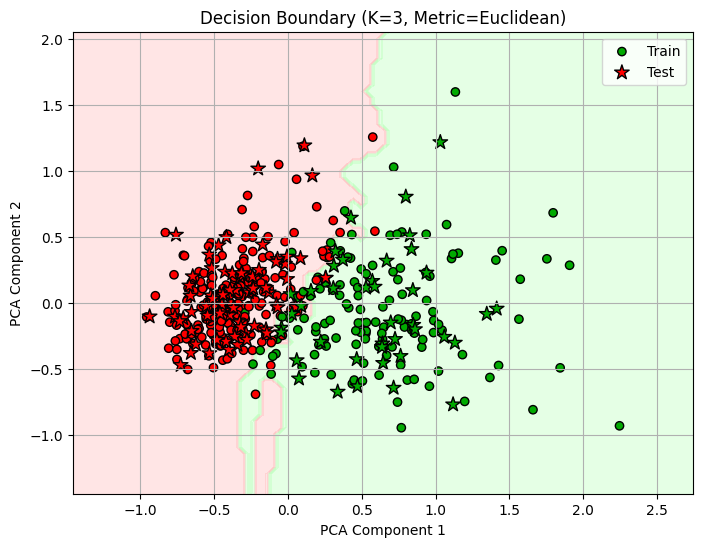

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# -----------------------------------------------------
# Pick best model (use your results)
# -----------------------------------------------------
best_metric = "euclidean"   # replace with your best metric
best_k = 3                  # replace with your best k

# -----------------------------------------------------
# Prepare 2D data using PCA (for visualization)
# -----------------------------------------------------
Xtr_best, _, Xte_best = metric_to_data[best_metric]

# Combine train and test data for PCA visualization
X_combined = np.vstack((Xtr_best, Xte_best))
y_combined = np.hstack((y_train, y_test))

# Reduce to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_combined)

# Split back into train/test sets
X_train_2d = X_2d[:len(Xtr_best)]
X_test_2d = X_2d[len(Xtr_best):]

# Train KNN on 2D data
clf_2d = KNNClassifier(k=best_k, distance_metric=best_metric)
clf_2d.fit(X_train_2d, y_train)

# -----------------------------------------------------
# Create decision boundary grid
# -----------------------------------------------------
x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict each grid point
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# -----------------------------------------------------
# Plot decision boundary and data points
# -----------------------------------------------------
plt.figure(figsize=(8,6))

# Colors for the 2 classes (customizable)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00AA00'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', label='Train')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=cmap_bold, marker='*', s=120, edgecolor='k', label='Test')

plt.title(f"Decision Boundary (K={best_k}, Metric={best_metric.capitalize()})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
